# Hi Guys! Welcome to Class
<p>
Today we'll learn about linear regression in machine learning.
</p>
<p>
Simple linear regression is an approach for predicting a response using a single feature.
</p>
<p>
It is assumed that the two variables are linearly related. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).
</p>


# Building Linear Regression Model from scratch using numpy
<p>Now we'll build a linear regression model from scratch using numpy library and analyze the results</p>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

In [3]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
y

array([ 1,  3,  2,  5,  7,  8,  8,  9, 10, 12])

In [0]:
def plotData(x,y):
    if(len(x)!=len(y)):
        return
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, color = "b", marker = "o", s = 30) 
    plt.axis('tight')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

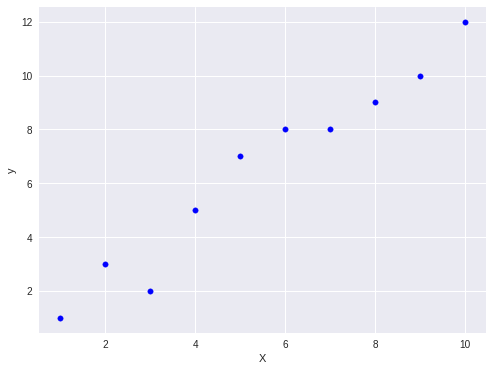

In [6]:
plotData(X,y)

### Least Square Method

Mathematical details here : https://www.mathsisfun.com/data/least-squares-regression.html

In [0]:
def estimate_coef(x, y):
    # number of training examples
    m = np.size(x)
  
    # mean of x and y vector
    mean_x, mean_y = np.mean(x), np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - m*mean_y*mean_x
    SS_xx = np.sum(x*x) - m*mean_x*mean_x
  
    # calculating regression coefficients 
    a1 = SS_xy / SS_xx
    a0 = mean_y - a1*mean_x
  
    return(a0, a1)

def plotRegressionLine(x,y,coeff):
    if(len(x)!=len(y)):
        return
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, color = "b", marker = "o", s = 30)
    y_pred = coeff[0] + coeff[1]*x 
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
    plt.axis('tight')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

In [8]:
coeff = estimate_coef(X, y)
print("Estimated coefficients:- a0 :",coeff[0],"and a1 :",coeff[1]) 

Estimated coefficients:- a0 : 0.06666666666666643 and a1 : 1.1696969696969697


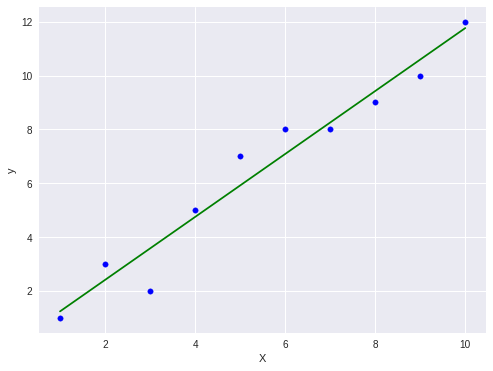

In [9]:
plotRegressionLine(X, y, coeff)

### Gradient Descent Method

Mathematical Details Here: https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/

In [0]:
epochs = 1000
learning_rate=0.0001

In [0]:
def linear_regression(X,y,epochs,learning_rate,a1=0,a0=0):
    N = float(len(y))
    for i in range(epochs):
        y_current = (a1 * X) + a0
        cost = sum([data**2 for data in (y-y_current)]) / 2*N
        a1_gradient = -(1/N) * sum(X * (y - y_current))
        a0_gradient = -(1/N) * sum(y - y_current)
        a1 = a1 - (learning_rate * a1_gradient)
        a0 = a0 - (learning_rate * a0_gradient)
    return a0, a1, cost

In [0]:
a0, a1, cost = linear_regression(X, y,epochs,learning_rate)

In [21]:
print("Estimated coefficients:- a0 :",a0,"and a1 :",a1)
print("Estimated Cost :",cost) 

Estimated coefficients:- a0 : 0.16066542752675148 and a1 : 1.1331853174657542
Estimated Cost : 29.249651389002977


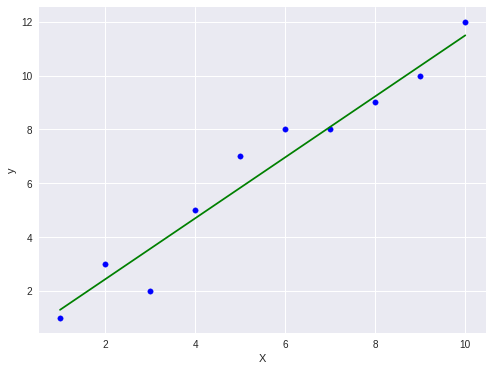

In [22]:
plotRegressionLine(X, y, [a0,a1])

# Using scikit learn linear model

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [0]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = x0 + 2*x1 + 3
y = np.dot(X, np.array([1, 2])) + 3

In [0]:
X

In [0]:
y

In [0]:
reg = LinearRegression().fit(X, y)

In [0]:
print("Score on training data : ",reg.score(X, y))

In [0]:
print("Estimated coefficients : ",reg.coef_)

In [0]:
print("Estimated Intercept : ",reg.intercept_ )

In [0]:
testX = [4,5]

In [0]:
print("Prediction for X =",testX," ,y =",reg.predict(np.array([testX]))[0])

In [0]:
print("Ground Truth for X =",testX," ,y =",testX[0]+2*testX[1]+3)